# Exploratory Data Analysis of Supermarket Sales Data

## Introduction

In this project, we will [something]


## Supermarket Dataset

For this project, I will use a public dataset of historical supermarket sales data: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/ 

The dataset contains 3 months of historical sales data for 3 different branches of a supermarket company in Myanmar. The sales data was recorded from January 2019 to March 2019.

The dataset has:

<b>1000 rows</b> - each row represents a different supermarket order

<b>17 columns</b>


|       Column Name       | Data Type | Description |
| :---------------------- | :--------: | :---------- |
| Invoice ID              | object  | Computer generated sales slip invoice identification number |
| Branch                  | object       | Branch of supercenter (3 branches are available identified by A, B and C)           |
| City                    | object       | The city the supermarket is located in         |
| Customer type           | object      | If customer used member card, type is "Members", otherwise "Normal"         |
| Gender                  | object       | Gender of customer           |
| Product line            | object       | General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel           |
| Unit price              | float64 | Price of each product in $           |
| Quantity                | int64       | Number of products purchased by customer          |
| Tax                     | float64      | 5% tax fee for customer buying          |
| Total                   | float64       | Total price including tax           |
| Date                   | object       | Date of purchase (Record available from January 2019 to March 2019)           |
| Time                    | object       | Purchase time (10am to 9pm)           |
| Payment                 | object       | Payment used by customer for purchase (3 methods are available – Cash, Credit card, and Ewallet)           |
| cogs              | int       | Cost of goods sold           |
| gross margin percentage | float64       | Gross margin percentage           |
| gross income            | float64       | Gross income          |  
| Rating                  | float64       | Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)           |  



## Import Python Libraries

In [66]:
# Numerical Operations and Data Manipulation
import numpy as np
import pandas as pd

# Statistical Testing
from scipy.stats import ttest_ind

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Supermarket Sales Dataset

In [3]:
# Convert CSV file to Pandas DataFrame object
sales_df = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

## Initial Data Exploration
Let's start by examining the first 10 rows of the data

In [4]:
sales_df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


Next, we'll look at the columns. 

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

There are 1000 rows in this dataset. None of the columns have missing values, so we don't need to address null values.

The date column might consist of strings. Let's take a closer look. 

In [6]:
# Examine the Date column to determine type of object
sales_df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

The Date column is currently storing the date of transactions as string objects. Converting the dates from string objects to datetime objects will allow us to more easily sort and filter transactions by date, perform time series analysis, and visualize sales metrics over time. 

In [7]:
# Convert the Date column to datetime objects
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

# Examine the Date column again to confirm successful conversion
sales_df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

The data type is now listed as datetime64, as expected.

Let's use the Date column as the new index and sort from earliest to latest transaction date.

In [8]:
# Use date as new index
sales_df.set_index('Date', inplace = True)

# Sort the transactions from earliest to latest
sales_df.sort_index(inplace = True)

# Confirm that changes were successful
sales_df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,4.761905,43.749,6.0
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,4.761905,4.072,9.5
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,4.761905,14.523,6.7


The previous index column has been succesfully replaced by the Date column. We see that there are now 16 columns instead of the original 17. The dates are also correctly sorted from 2019-01-01 to 2019-03-30.

Let's examine branch and city frequencies.

In [56]:
# Determine the number of transactions that occurred at each branch
sales_df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [ ]:
Branch A had 340 transactions, Branch B had 332 transactions, and Branch C had 328 transactions.

In [57]:
# Determine the number of transactions that occurred in each city of Myanmar
sales_df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Yangon had 340 transactions, Mandalay had 332 transactions, and Naypyitaw had 328 transactions.

We can infer that Branch A of the supermarket is in Yangon, Branch B is in Mandalay, and Branch B is in Naypyitaw.

Let's calculate some summary statistics for the dataset.

In [9]:
sales_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


We can make several observations:

1) The average customer rating was 6.97270 out of 10. The minimum rating was 4.00000 and the maximum was 10.00000. 

2) Supermarket customers had an average of 5.51 items in their cart. The minimum was 1 item and the maximum was 10 items.

3) Since the supermarkets were in Myanmar, we might infer that the local currency was the Myanmar Kyat (Ks.). However, the US dollar ($) is also used. An average of 5 items at a supermarket costing an average of 322 units of currency strongly suggests the Myanmar Kyat is the answer. 

4) A supermarket transaction had an average cost of Ks. 322.966749/-, a minimum cost of Ks. 10.678500/-, and a maximum cost of Ks. 1042.650000/-. 

5) There seem to be a few points to note with the unit price, cogs, gross margin percentage, and gross income columns. Each column is derived by calculations using the Total, Tax 5%, and Quantity columns. 

&nbsp; a)<b> Unit price:</b> The unit price is normally the price per individual item. In the context of an entire cart of different items, the unit price 
    is really referring to the average price per item paid by the customer before tax. Thus ->
    Unit price = (Total - Tax 5%) / (Quantity)
    
&nbsp;b)<b> cogs:</b> The cogs (cost of goods sold) column is not referring to the cost of goods paid by the store to obtain items and stock their shelves, but rather the pre-tax subtotal price for all items in a customer's cart. Thus ->
    <br><br>cogs = (Total - Tax 5%)
    
 &nbsp;c)<b> gross income:</b> The gross income would normally be -> <br><br>gross income = (total paid by customer) - (cost to obtain goods). <br><br>However, the calculation in this dataset is subtracting the cogs column from the total column. Since cogs is actually the pre-tax total price, taking total - cogs is really just the tax 5% value. The column is based on an incorrect calculation because the cogs column is not actually referring to the cost of goods paid by the supermarket.
    
 &nbsp;d)<b> gross margin percentage:</b> The gross margin percentage appears odd. Every single column has the same value. Typically, the gross margin percentage would be -> <br><br>gross margin percentage = ((gross income) / (total paid by the customer)) * 100. <br><br>However, the fact the the cogs column is not actually referring to the cost paid by the supermarket for goods means that this column also has an error. 
 
In this case, we cannot contact the database owner for the correct values for the cogs column. We can still use the dataset to generate insights. The cost of goods is crucial to find gross income and gross margin percentage, and I do not have a way of finding the cost of goods. I will therefore remove the gross income and gross margin percentage columns. I will also rename the cogs column to "pre-tax total" to better describe its actual values.

## Data Cleaning

We have already determined that no missing values were found in the dataset. Before we remove columns, we will first check for duplicates. 

In [10]:
# Count number of duplicate rows 
sales_df.duplicated().sum()

0

With 16 columns of values, no duplicates were found. Next, we will remove the two columns with erroneous calculations.

In [11]:
# Remove columns with incorrect calculations
corrected_sales_df = sales_df.drop(['gross income', 'gross margin percentage'], axis=1)

# Confirm column removal was successful
corrected_sales_df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating
Date,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0


Let's rename the cogs column to the "Pre-tax total" column.

In [13]:
# Rename column to more accurate description
corrected_sales_df.rename(columns={'cogs': 'Pre-tax total'}, inplace = True)

# Confirm column renaming was successful
corrected_sales_df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,Pre-tax total,Rating
Date,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0


## Data Analysis


### What is the overall customer rating for the supermarket company? 

Let's start by looking at the frequency for different customer ratings. We'll create a histogram for ratings across all 3 branches of the supermarket. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


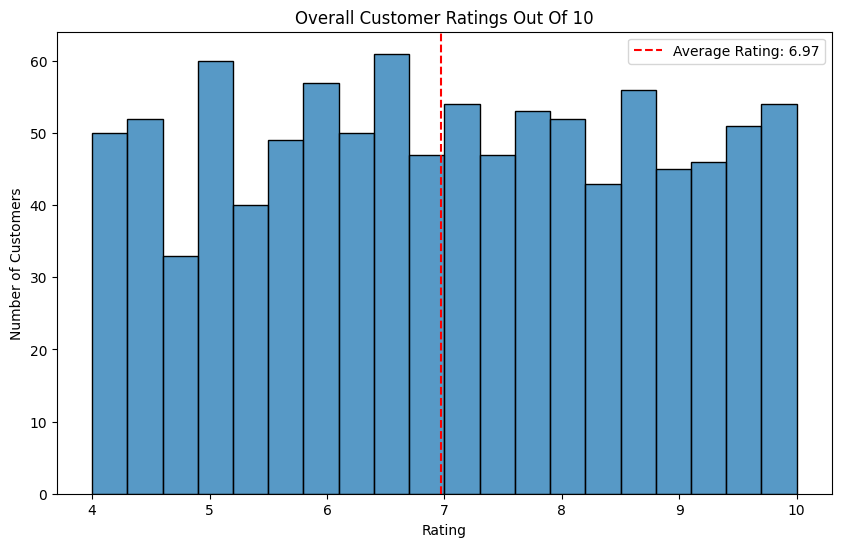

In [51]:
# Create a histogram of overall customer ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=corrected_sales_df, x='Rating', bins=20)

# Set title and labels for x-axis and y-axis
plt.title('Overall Customer Ratings Out Of 10')
plt.xlabel('Rating')
plt.ylabel('Number of Customers')

# Add the average rating as a vertical dashed line to the histogram
average_rating = corrected_sales_df['Rating'].mean()
plt.axvline(x=average_rating, color='red', linestyle='--', label='Average Rating: {:.2f}'.format(average_rating))
plt.legend()

# Display the histogram
plt.show()

* There is a fairly even distribution of ratings from 4 - 10
* The overall average rating was 6.97 out of 10
* Although this data is historical, customer surveys could have been used to help identify the most common issues faced by customers

### How do customer ratings compare across the 3 supermarket branches?

Now, let's examine each of the 3 branches of the supermarket to view their individual distributions of ratings. Is there a particular branch with lower customer satisfaction?
Recall that Branch A of the supermarket is in Yangon, Branch B is in Mandalay, and Branch B is in Naypyitaw.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


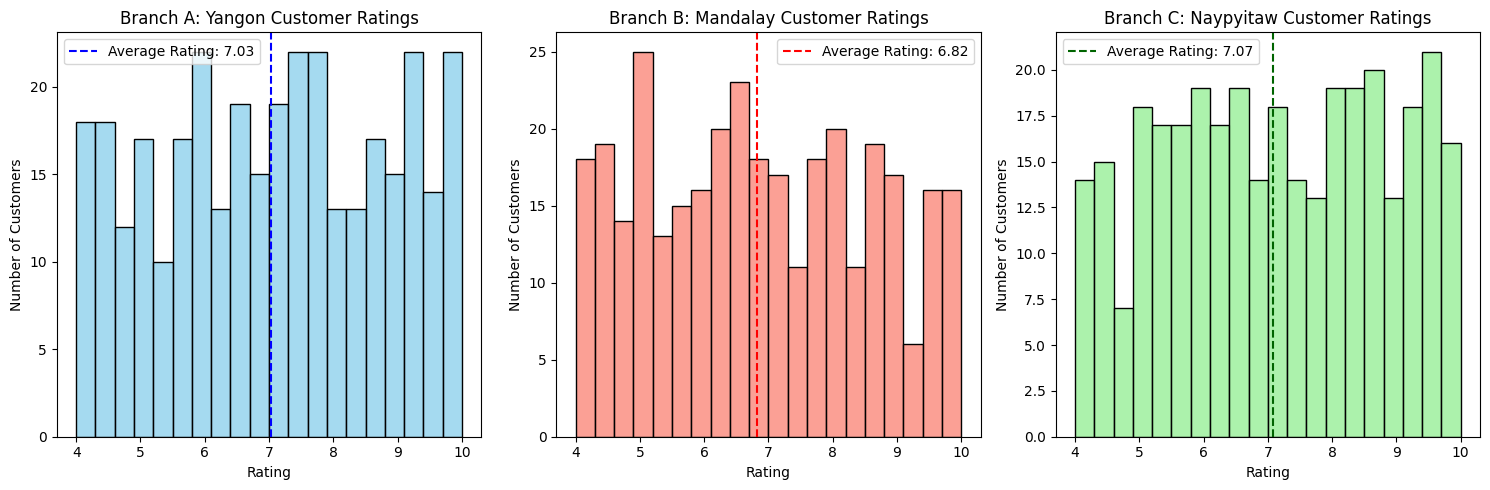

In [65]:
# Create subsets of the data for each branch using Boolean masks
yangon_df = corrected_sales_df[corrected_sales_df['City'] == 'Yangon']
mandalay_df = corrected_sales_df[corrected_sales_df['City'] == 'Mandalay']
naypyitaw_df = corrected_sales_df[corrected_sales_df['City'] == 'Naypyitaw']

# Set up 3 histograms side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.histplot(data=yangon_df, x='Rating', bins=20, ax=axes[0], color='skyblue')
sns.histplot(data=mandalay_df, x='Rating', bins=20, ax=axes[1], color='salmon')
sns.histplot(data=naypyitaw_df, x='Rating', bins=20, ax=axes[2], color='lightgreen')

# Set titles, x-axis labels, and y-axis labels
axes[0].set_title('Branch A: Yangon Customer Ratings')
axes[1].set_title('Branch B: Mandalay Customer Ratings')
axes[2].set_title('Branch C: Naypyitaw Customer Ratings')
axes[0].set_xlabel('Rating')
axes[1].set_xlabel('Rating')
axes[2].set_xlabel('Rating')
axes[0].set_ylabel('Number of Customers')
axes[1].set_ylabel('Number of Customers')
axes[2].set_ylabel('Number of Customers')

# Add the average rating as a vertical dashed line to the 3 histograms
yangon_average_rating = yangon_df['Rating'].mean()
mandalay_average_rating = mandalay_df['Rating'].mean()
naypyitaw_average_rating = naypyitaw_df['Rating'].mean()
axes[0].axvline(x=yangon_average_rating, color='blue', linestyle='--', label='Average Rating: {:.2f}'.format(yangon_average_rating))
axes[1].axvline(x=mandalay_average_rating, color='red', linestyle='--', label='Average Rating: {:.2f}'.format(mandalay_average_rating))
axes[2].axvline(x=naypyitaw_average_rating, color='darkgreen', linestyle='--', label='Average Rating: {:.2f}'.format(naypyitaw_average_rating))
axes[0].legend()
axes[1].legend()
axes[2].legend()

# Arrange the subplots neatly
plt.tight_layout()

# Display the 3 histograms
plt.show()

* The rating distributions are relatively similar across all three supermarket branches in different cities
* The difference in average ratings between supermarket branches is relatively small. The highest rating was 7.07 / 10 in Naypyitaw. The lowest was 6.82 in Mandalay. There is not a single branch that seems to have disproportionately low ratings.

Is the difference in ratings statistically significant? We can run an independent two-sample t-test to find out.

<b>Null hypothesis:</b> There is no statistically significant difference in ratings between the Mandalay branch and the Naypyitaw branch.
<br><b>Alternative hypothesis:</b> There is a statistically significant difference in ratings between the Mandalay branch and the Naypyitaw branch.

We will define our confidence level to be 95%, which is common in industry. <br>Let us see if the resulting difference is statistically signficant.


In [98]:
# Isolate the ratings from each branch
mandalay_ratings = mandalay_df['Rating']
naypyitaw_ratings = naypyitaw_df['Rating']

# Find the t-statistic and p-value for the difference
t_statistic, p_value = ttest_ind(mandalay_ratings, naypyitaw_ratings)
print("Independent Two-Sample T-Test:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value) 

# Determine statistical significance of results
if p_value < 0.05:
    print("\nThere is a statistically significant difference between the customer ratings for Mandalay and for Nyapyitaw.")
else:
    print("\nThere is no statistically significant difference between the customer ratings for Mandalay and for Nyapyitaw.")

Independent Two-Sample T-Test:
T-Statistic: -1.9148758475756376
P-Value: 0.055941624627607975

There is no statistically significant difference between the customer ratings for Mandalay and for Nyapyitaw.


* The t-statistic quantifies the difference in sample means relative to the variability between the groups.
* The p-value represents the probability of observing results at least as extreme as those observed in the test if the null hypothesis is true. Since our confidence interval was 95%, the threshold for signficance is 5%. If there had been less than a 5% chance that we would have observed these results as a result of random chance, we would have concluded that the result was statistically significant. However, our p-value was higher than the threshold.

* We conclude that there is <b>no statistically significant difference in the customer ratings</b> between the highest and lowest rated branches. 
* The difference observed could reasonably be due to random chance. We fail to reject the null hypothesis.

### What percentage of transactions were made using a member's card?

We can easily create a pie chart to help answer this question.

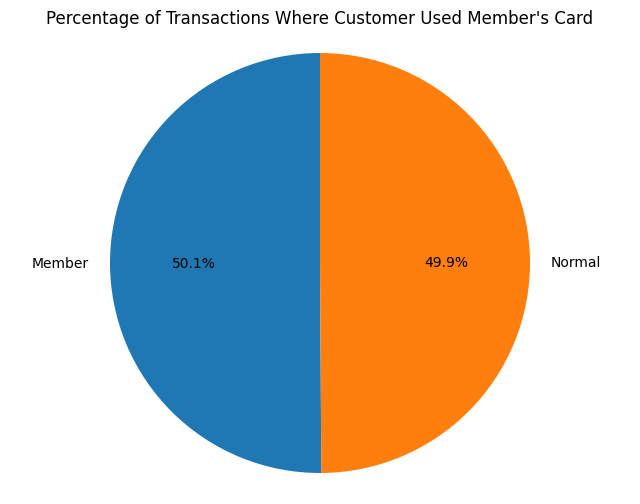

In [77]:
# Find the percentages for "Member" customers vs "Normal" customers
customer_type_counts = corrected_sales_df['Customer type'].value_counts(normalize = True)

# Create a pie chart to visualize the results
plt.figure(figsize=(8, 6))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Transactions Where Customer Used Member\'s Card')
plt.axis('equal')

# Display the pie chart
plt.show()

* There is a roughly even split of transactions involving a member's card versus those which did not. 
* 50.1% of transactions used a member's card and 49.9% did not.

### Do customers who use a member's card spend more money on average than non-members?

Answering this question can help determine if the company should invest resources into increasing their membership count.

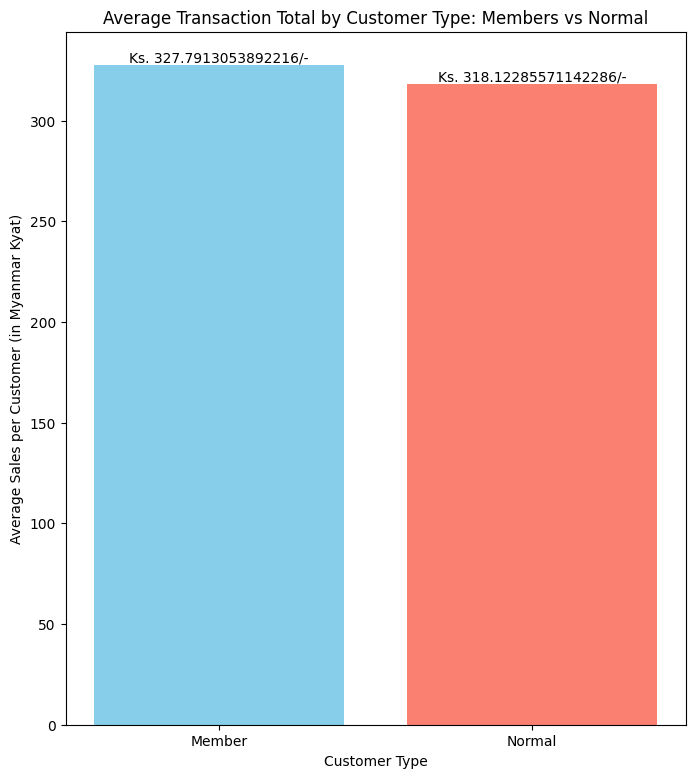

In [96]:
# Create subsets of the data for each customer type using Boolean masks
member_df = corrected_sales_df[corrected_sales_df['Customer type'] == 'Member']
normal_df = corrected_sales_df[corrected_sales_df['Customer type'] == 'Normal']

# Find average sales per customer type
avg_sales_per_member_customer = member_df['Total'].mean()
avg_sales_per_normal_customer = normal_df['Total'].mean()

# Set up a bar plot
values = [avg_sales_per_member_customer, avg_sales_per_normal_customer]
plt.figure(figsize=(8, 9))
bars = plt.bar(['Member', 'Normal'], values, color=['skyblue', 'salmon'])

# Add title, x-axis label, and y-axis label
plt.xlabel('Customer Type')
plt.ylabel('Average Sales per Customer (in Myanmar Kyat)')
plt.title('Average Transaction Total by Customer Type: Members vs Normal')

# Add labels for average sales values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'Ks. {value}/-', ha='center', va='bottom')

# Show the plot
plt.show()

* More money was spent in transactions involving a member's card than transactions without a member's card
* If the customer used a member's card, the average transaction total was about Ks. 327.79/-
* If the customer did not use a member's card, the average transaction total was about Ks. 318.12/-

Let's run another independent two-sample t-test to determine if this result is statistically significant.

<b>Null hypothesis:</b> There is no statistically significant difference in transaction totals between transactions that use a member's card versus those that do not.
<br><b>Alternative hypothesis:</b> There is a statistically significant difference in transaction totals between transactions that use a member's card versus those that do not.

The confidence level will be 95% once again.

In [99]:
# Isolate the transaction total data for each customer type
member_totals = member_df['Total']
normal_totals = normal_df['Total']

# Find the t-statistic and p-value for the difference
t_statistic, p_value = ttest_ind(member_totals, normal_totals)
print("Independent Two-Sample T-Test:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value) 

# Determine statistical significance of results
if p_value < 0.05:
    print("\nThere is a statistically significant difference between the average transaction totals based on membership.")
else:
    print("\nThere is no statistically significant difference between the average transaction totals based on membership.")

Independent Two-Sample T-Test:
T-Statistic: 0.6215268724928228
P-Value: 0.5343949596143621

There is no statistically significant difference between the average transaction totals based on membership.


* Although we observed an interesting difference in average transaction totals, the difference is not large enough to be statistically significant.
* We fail to reject the null hypothesis. The difference could reasonably be the result of random chance. 
* Since <b>members do not spend more on average per transaction than non-members</b>, investing resources into increasing membership counts may not be a high priority.

### How common are each of the payment methods?

### Which of the 3 branches of the supermarket had the highest total sales?

### Which product lines drove the highest sales? Which were the most common?

### Was there a gender difference in the most common product lines?  

### How did sales fluctuate over the 3 month period?

### 